##Linear Regression and Polynomial Regression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/Reward_system.csv')

df.head()

,Hours,Points
0,10,1000
1,12,1200
2,14,1400
3,15,1600
4,17,2400


In [17]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linearRegression = LinearRegression()

linearRegression.fit(X,y)

LinearRegression()

In [20]:
y_pred = linearRegression.predict(X)

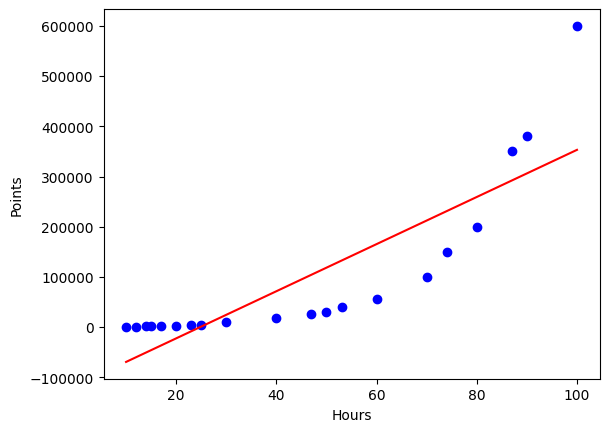

In [21]:
plt.scatter(X,y,color='blue')
plt.plot(X, y_pred,color='red')
plt.xlabel("Hours")
plt.ylabel("Points")
plt.show()

#Polynomial Regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
polynomial = PolynomialFeatures(degree=3) #Hàm bậc 3

X_polynomial = polynomial.fit_transform(X)

polynomial.fit(X_polynomial, y)

linearPolynomial = LinearRegression()

linearPolynomial.fit(X_polynomial, y)

LinearRegression()

In [24]:
y_pred = linearPolynomial.predict(X_polynomial)

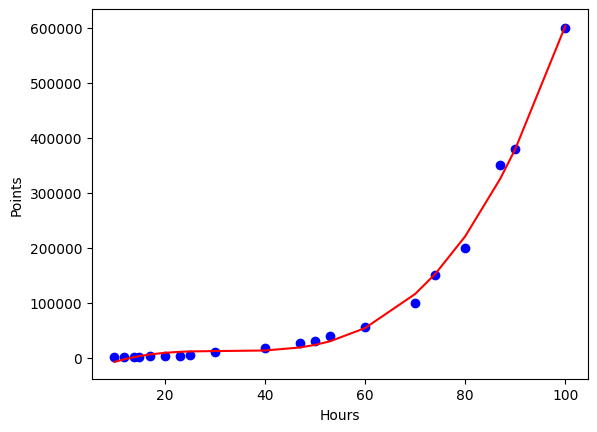

In [25]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel("Hours")
plt.ylabel("Points")
plt.show()

In [26]:
predictedByLinearModel = linearRegression.predict([[100]])

predictedByPolynomialModel = linearPolynomial.predict(polynomial.fit_transform([[100]]))

In [27]:
print(predictedByLinearModel, predictedByPolynomialModel)

[353121.12328344] [603259.17989418]


#HCI Student Performance Dataset

In [53]:
df = pd.read_csv('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/week 1/student-mat.csv',sep=";")

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [54]:
df = df[['G1','G2','G3','studytime','failures','absences']]

df.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [55]:
X = df.drop(columns=['G3'])
y = df['G3']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [57]:
from sklearn.model_selection import train_test_split
import pickle

In [58]:
hciLinearRegression = LinearRegression()

In [59]:
best = 0
for i in range(30):
  hciLinearRegression.fit(X_train, y_train)
  accuracy = hciLinearRegression.score(X_test, y_test)
  # print("Accuracy: " + str(accuracy))
  if accuracy > best:
    best = accuracy
    with open('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/Supervised Learning/Linear Regression/hci_student_parameter.pickle', "wb") as file:
      pickle.dump(hciLinearRegression, file)


In [60]:
pickleInputfile = open('/content/drive/MyDrive/Phuong PT/Documents/AI Developer/Courses/SaigonTech AI Developer/Machine Learning Foundation and Practice/Supervised Learning/Linear Regression/hci_student_parameter.pickle', "rb")

linearModelFromFile = pickle.load(pickleInputfile)

In [61]:
predictedValue = linearModelFromFile.predict(X_test)

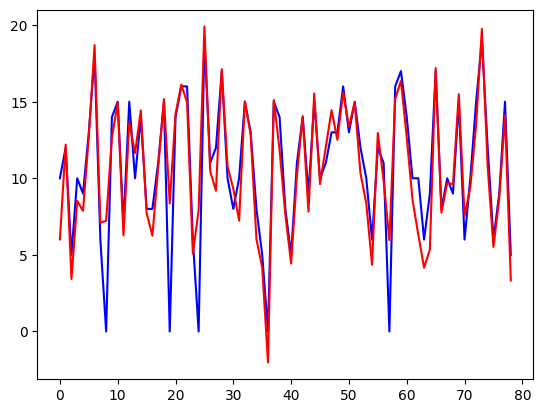

In [66]:
plt.plot(list(y_test), color='b')
plt.plot(predictedValue, color='r')
plt.show()